In [1]:
import pickle
import requests
import qckt
import qckt.noisemodel as ns

In [7]:
ck = qckt.QCkt(2,2)
ck.H(0)
ck.CX(0,1)
ck.Probe()
ck.M([1,0])
ck.draw()

noise_profile = ns.NoiseProfile(noise_chan_allgates=ns.bit_flip(0.1))
ck.set_noise_profile(noise_profile=noise_profile)
ck.draw()

job = qckt.Job(circuit=ck, shots=100, qtrace=True)

q000 -[H]-[.]--v-[M]-
           |   v  |  
q001 -----[X]--v-[M]-
               v  |  
creg ==========v==v==
               v     
q000 -[H]-[H:BF(0.10)]-[.]-[CX:BF(0.10)]--v-[M]-
                        |                 v  |  
q001 ------------------[X]-[CX:BF(0.10)]--v-[M]-
                                          v  |  
creg =====================================v==v==
                                          v     


Measured value of qubits = 00
Integer value of measured value = 0


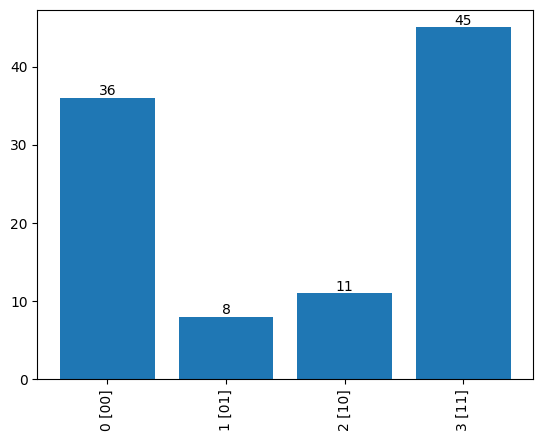

In [8]:
# url = 'http://192.168.0.138:5000/runjob'
url = 'http://192.168.1.231:5000/runjob'

job_pkl = pickle.dumps(job)
retval_pkl = requests.post(url, data=job_pkl)
retval = pickle.loads(retval_pkl.content)

job.result = retval['result']
job.runstats = retval['runstats']
creg = job.get_creg()
print(f'Measured value of qubits = {creg[0]}')
print(f'Integer value of measured value = {creg[0].intvalue}')
job.plot_counts()
print(retval['stderr'])
print(retval['stdout'])